# Can you find a matching pair of socks??

This is my solution to the 538 Riddler Classic from December 20th, 2019.

https://fivethirtyeight.com/features/can-you-find-a-matching-pair-of-socks/
    
From Kathy Bischoping comes a question we’ve all asked ourselves at one time or another:

I have 10 pairs of socks in a drawer. Each pair is distinct from another and consists of two matching socks. Alas, I’m negligent when it comes to folding my laundry, and so the socks are not folded into pairs. This morning, fumbling around in the dark, I pull the socks out of the drawer, randomly and one at a time, until I have a matching pair of socks among the ones I’ve removed from the drawer.

On average, how many socks will I pull out of the drawer in order to get my first matching pair?

(Note: This is different from asking how many socks I must pull out of the drawer to guarantee that I have a matching pair. The answer to that question, by the pigeonhole principle, is 11 socks. This question is instead asking about the average.)

Extra credit: Instead of 10 pairs of socks, what if I have some large number N pairs of socks?

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [20]:
 def messy_sock_drawer(no_of_pairs = 10, sims = 1):
    
    # initialise a list to store results of simulations
    pulls = []
    
    for sim in range(sims):

        # initialise variables and empty lists
        drawer = []
        removed_socks = []

        # create a drawer full of socks, and shuffle them about
        for sock in range(1, no_of_pairs + 1):
            drawer += [sock] * 2
        random.shuffle(drawer)

        # continue to pull socks out of the drawer, until you have two of a kind
        while True:
            pulled_sock = drawer[0]
            removed_socks.append(drawer[0])
            del drawer[0]
            if removed_socks.count(pulled_sock) > 1:
                break

        # calculate the number of pulls it took to get two of a kind
        pulls_needed = len(removed_socks)
        pulls.append(pulls_needed)
    
    return pulls

In [33]:
# run the function for ten pairs of socks, and a 100k simulations
pulls = messy_sock_drawer(10, 100000)
average_pulls =np.mean(pulls)
print("The average number of pulls to return a pair is: " + str(average_pulls))

The average number of pulls to return a pair is: 5.67686


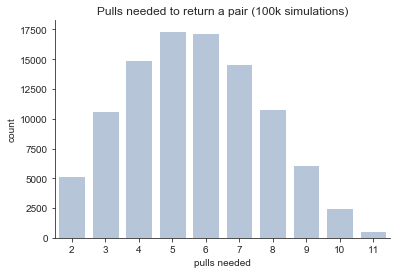

In [42]:
# plot the results of the above simulation
sns.set_style('ticks')
sns.countplot(pulls, color = 'lightsteelblue')
sns.despine(top = True, right = True)
plt.xlabel("pulls needed")
plt.ylabel("count")
plt.title("Pulls needed to return a pair (100k simulations)")
plt.show()